## Step 1: Load and Prepare Data

In [1]:
import pandas as pd

# Load pre-COVID and post-COVID data
pre_covid_data = pd.read_csv('pre_covid_data(1).csv')
post_covid_data = pd.read_csv('covid_data(1).csv')

# Combine the data for a unified analysis
data = pd.concat([pre_covid_data, post_covid_data])

# Display the first few rows of the combined data
print(data.head())

                        App Name        Category  Rating  Reviews        Size  \
0  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
1  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
2  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
3  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
4  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   

   Installs  Type  Price Content Rating                   Genres  ...  \
0    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
1    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
2    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
3    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
4    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   

    Android Ver                                  Translated_Review Sentime

## Step 2: Preprocess Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant columns (excluding Price because it's 0)
columns = ['Reviews', 'Genres', 'Rating']
data = data[columns]

# Handle missing values
data.dropna(inplace=True)

# Convert categorical data to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Genres'] = label_encoder.fit_transform(data['Genres'])

# Display the preprocessed data
print(data.head())

# Split the data into features (X) and target (y)
X = data.drop('Rating', axis=1)
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


   Reviews  Genres  Rating
0    20260       3     4.7
1    20260       3     4.7
2    20260       3     4.7
3    20260       3     4.7
4    20260       3     4.7
Training set size: (95013, 2)
Testing set size: (23754, 2)


In [3]:
import pandas as pd

# Merge the data into a single DataFrame
data = pd.concat([pre_covid_data, post_covid_data], ignore_index=True)

# Display the first few rows of the combined data
print(data.head())

                        App Name        Category  Rating  Reviews        Size  \
0  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
1  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
2  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
3  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
4  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   

   Installs  Type  Price Content Rating                   Genres  ...  \
0    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
1    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
2    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
3    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
4    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   

    Android Ver                                  Translated_Review Sentime

In [4]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity,polarity,subjectivity
count,118767.000000,1.187670e+05,6.534000e+03,1.187670e+05,118767.0,111610.000000,111610.000000,118767.000000,118767.000000
mean,4.489271,4.245203e+06,3.482675e+07,8.983767e+07,0.0,0.208690,0.487455,0.170682,0.495714
std,0.212369,2.875752e+06,2.197082e+07,8.200443e+07,0.0,0.329432,0.247934,0.332162,0.240126
min,4.000000,1.877300e+04,4.400000e+06,5.000000e+05,0.0,-1.000000,0.000000,-1.000000,0.000000
25%,4.400000,3.368646e+06,1.500000e+07,1.000000e+08,0.0,0.000000,0.383333,-0.016590,0.361667
50%,4.400000,3.368705e+06,3.700000e+07,1.000000e+08,0.0,0.211198,0.500000,0.133333,0.516667
75%,4.700000,6.294397e+06,5.300000e+07,1.000000e+08,0.0,0.436970,0.633333,0.375000,0.633333
max,4.900000,5.664658e+07,7.700000e+07,1.000000e+09,0.0,1.000000,1.000000,1.000000,1.000000


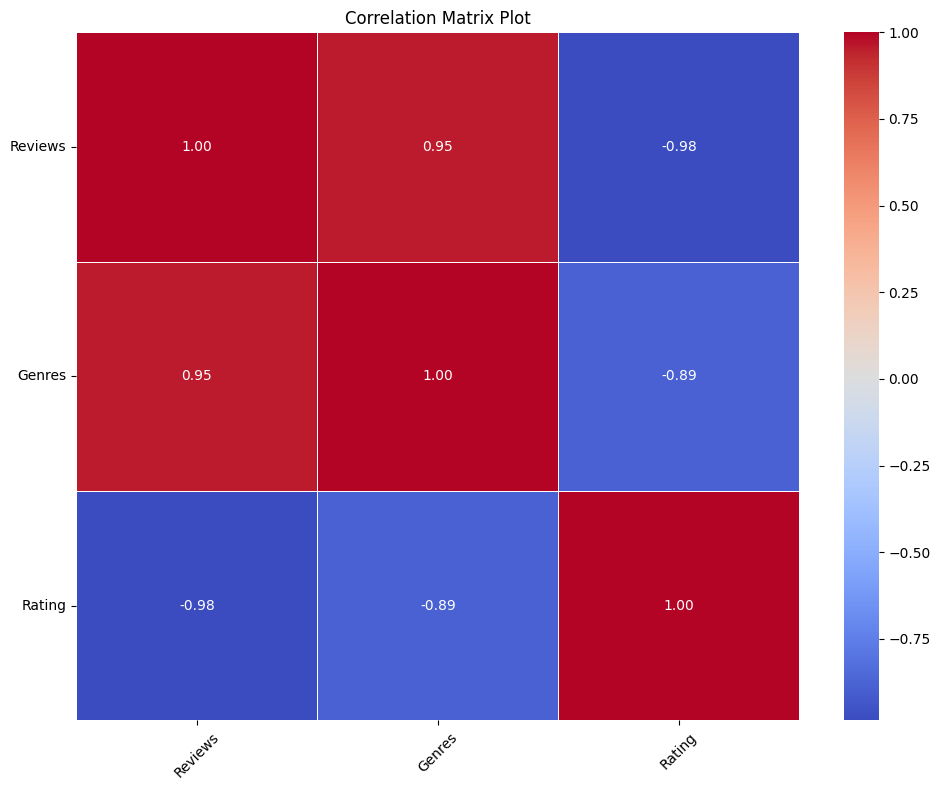

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a Price column
data['Price'] = [0] * len(data)  # If your Price column is all zeros, include this line

# Select relevant columns for correlation
correlation_columns = ['Reviews', 'Genres', 'Rating']

# Handle missing values if necessary
data.dropna(inplace=True)

# Convert categorical data (Genres) to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Genres'] = label_encoder.fit_transform(data['Genres'])

# Compute the correlation matrix
corr_matrix = data[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Step 3: Train a Random Forest Model

Random Forest Model:
Training score: 1.0
Testing score: 1.0


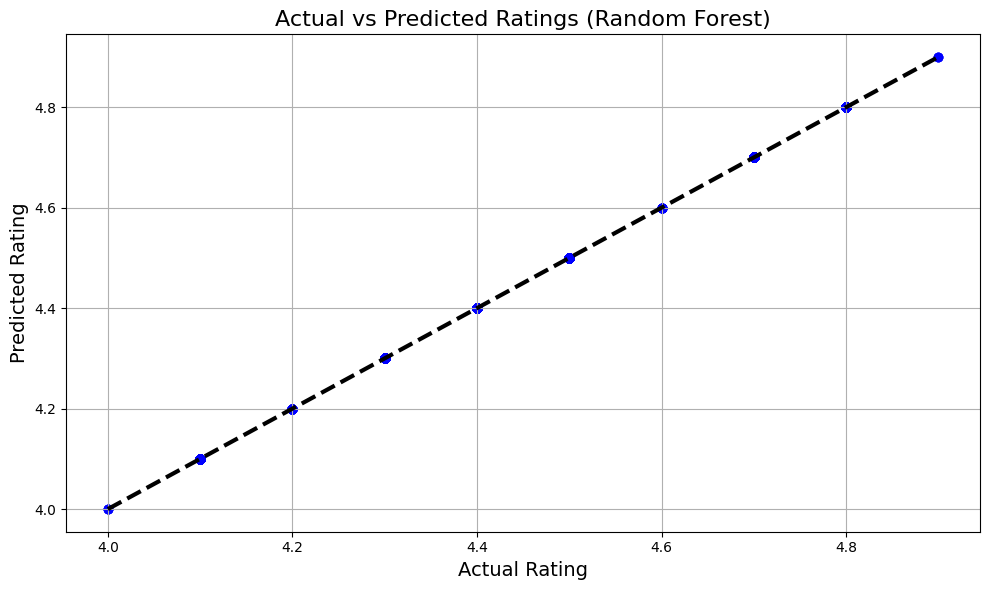

In [6]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

# Evaluate the model
train_score_rf = model.score(X_train, y_train)
test_score_rf = model.score(X_test, y_test)

print("Random Forest Model:")
print("Training score:", train_score_rf)
print("Testing score:", test_score_rf)

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Ratings (Random Forest)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 4: Evaluate Feature Importance

In [7]:
# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


   Feature  Importance
0  Reviews     0.75654
1   Genres     0.24346


## Step 5: Visualize Feature Importance

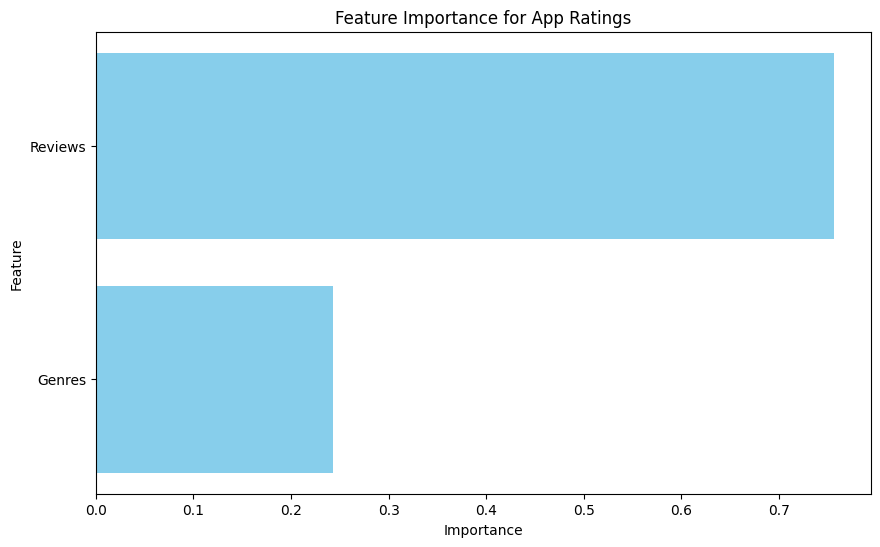

In [8]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for App Ratings')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Step 6: Train a Linear Regression Model

Model Performance Metrics:
Mean Squared Error: 0.022606595993784603
R-squared: 0.502320363462565


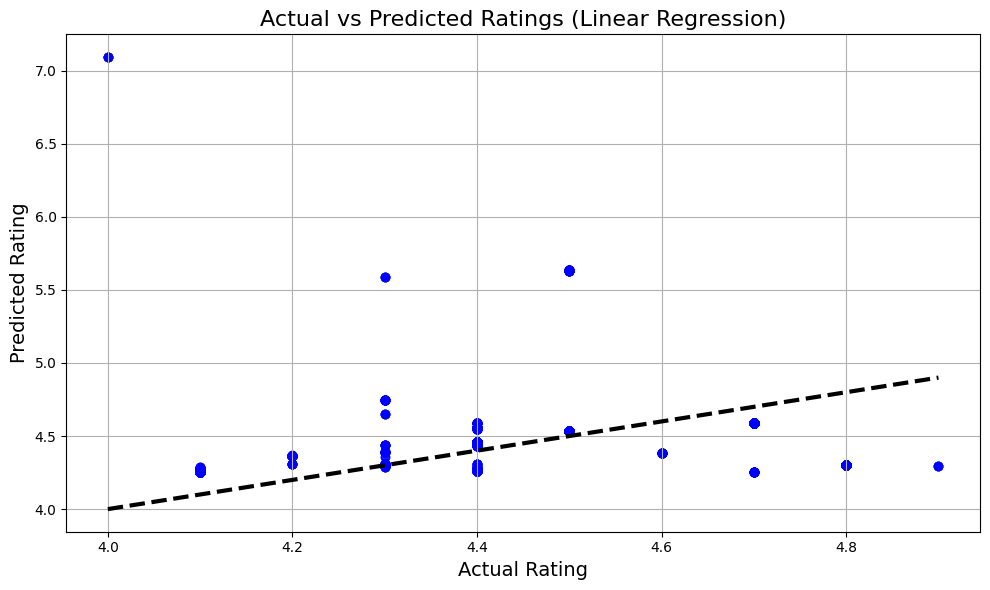

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance
print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Ratings (Linear Regression)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


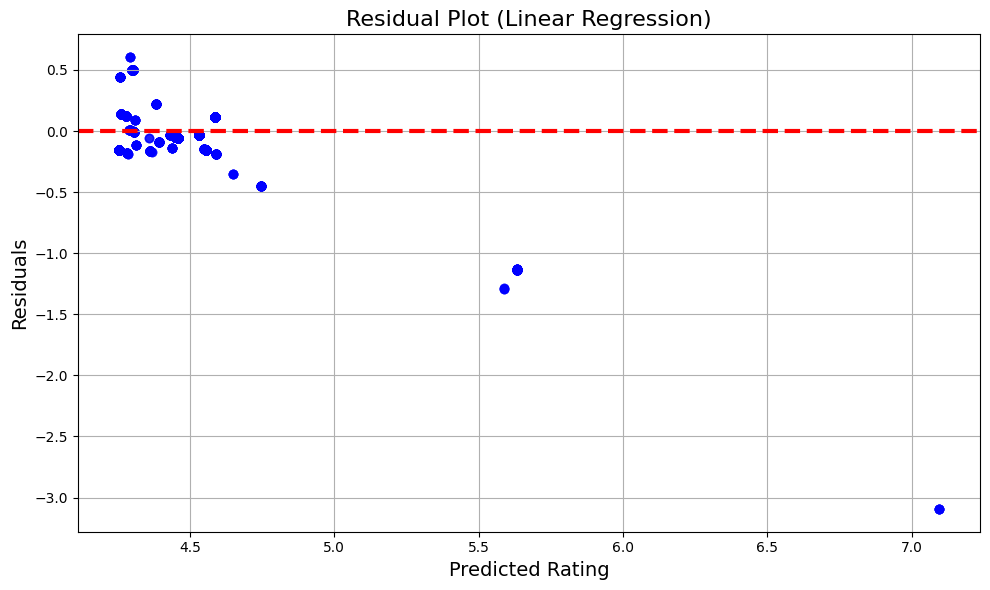

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (prediction errors)
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))

plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=3)
plt.xlabel('Predicted Rating', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot (Linear Regression)', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.show()


## Step 7: Train a Gradient Boosting Regressor Model

Model Performance Metrics:
Mean Squared Error: 3.94085806545958e-05
R-squared: 0.9991324280709034


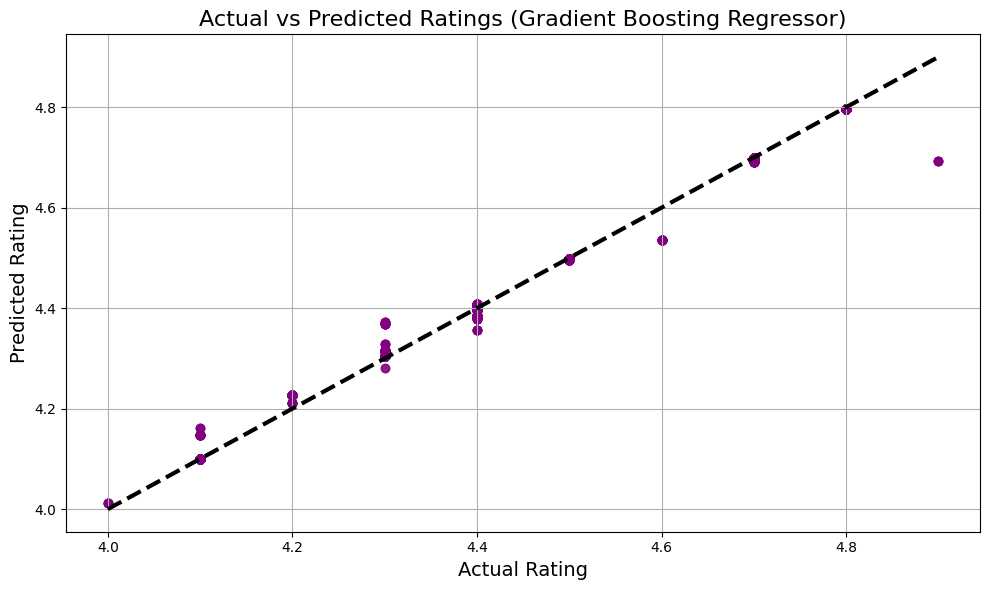

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Ratings (Gradient Boosting Regressor)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 8: Cross-Validation with Different Models
### Baseline Model

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize DummyRegressor with 'mean' strategy
dummy = DummyRegressor(strategy='mean')

# Perform cross-validation
dummy_cv_scores = cross_val_score(dummy, X, y, cv=5, scoring='neg_mean_squared_error')
dummy_mean_cv_score = np.mean(np.abs(dummy_cv_scores))

print(f"Baseline Mean Predictor CV MSE: {dummy_mean_cv_score}")

Baseline Mean Predictor CV MSE: 0.047008361313541885


### Cross-Validation for Liner Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Define the MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring=mse_scorer)

# Print the Mean CV MSE
print("Linear Regression Mean CV MSE:", np.mean(-cv_scores_lr))

Linear Regression Mean CV MSE: 0.02742951582524216


### Cross-Validation for Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = np.abs(grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best CV MSE: {best_score}")


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV MSE: 0.0004837866180429421


### Cross-Validation for Gradient Boosting 

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Define a smaller parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search_gb.fit(X, y)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.abs(grid_search_gb.best_score_)

print(f"Best Gradient Boosting parameters: {best_params_gb}")
print(f"Best Gradient Boosting CV MSE: {best_score_gb}")

Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting CV MSE: 0.0003817332123482651
